# Task 1: Data Preparation


In [2]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [3]:
# Load the data from the file NBA_players_stats.csv using pandas library.
nbaframe=pd.read_csv("NBA_players_stats.csv",sep=',',decimal='.',error_bad_lines=False)

In [6]:
nbaframe.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800


In [4]:
# Check whether the data is equal to the data in the source doc
nbaframe.shape

(512, 29)

In [5]:
#check if we have the right data types
nbaframe.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

### Begin with the Cleaning Process

#### Checking for the 'POS' Column

In [6]:
# Saving in different df to create checkpoints
position=nbaframe

In [7]:
# Check for typos in 'POS' Column
position['Pos'].value_counts()

SG        117
PF        102
C          98
PG         92
SF         83
 PG         3
SG          3
C           2
PG-SG       1
Sf          1
SF.         1
 SF         1
 SG         1
SGa         1
SF-PF       1
Pg          1
pg          1
PFa         1
PF          1
sg          1
Name: Pos, dtype: int64

In [8]:
# Remove all leading and trailing white spaces in 'Pos' Column
position['Pos']=position['Pos'].str.strip()
position['Pos'].value_counts()

SG       121
PF       103
C        100
PG        95
SF        84
PFa        1
pg         1
Pg         1
SF-PF      1
SGa        1
PG-SG      1
Sf         1
SF.        1
sg         1
Name: Pos, dtype: int64

In [9]:
# Fixing minor erros such as the (.) and (a) which are probable data entry errors.
position['Pos'] = position['Pos'].str.replace('.', '')
position['Pos'] = position['Pos'].str.replace('a', '')
position['Pos'].value_counts()

SG       122
PF       104
C        100
PG        95
SF        85
pg         1
Pg         1
SF-PF      1
PG-SG      1
Sf         1
sg         1
Name: Pos, dtype: int64

In [10]:
# Converting all records to Upper Case
position['Pos']=  position['Pos'].str.upper()
position['Pos'].value_counts()

SG       123
PF       104
C        100
PG        97
SF        86
SF-PF      1
PG-SG      1
Name: Pos, dtype: int64

#### Checking for 'Tm' Column

In [11]:
# Creating another checkpoint
team=position

In [12]:
# Check for errors in 'Tm' column
team['Tm'].value_counts()

BRK     19
WAS     18
SAC     18
HOU     18
DAL     17
DEN     17
TOR     17
LAL     17
CHI     17
DET     17
NYK     17
CLE     17
ORL     16
MIN     16
ATL     16
UTA     16
OKC     15
LAC     15
MIA     15
BOS     15
PHO     15
POR     14
PHI     14
GSW     14
NOP     14
MEM     14
MIL     14
SAS     14
IND     14
CHO     14
TOT      9
BRK      3
 PHI     3
 IND     2
 MEM     1
 BOS     1
ORL      1
DET      1
 PHO     1
SAS      1
OKC      1
 BRK     1
NyK      1
MEM      1
 ORL     1
 WAS     1
CLE      1
 NOP     1
MIL      1
GSW      1
IND      1
 TOT     1
H0U      1
MIA      1
 SAS     1
Name: Tm, dtype: int64

In [13]:
# Remove all leading and trailing white spaces in 'Tm' Column
team['Tm']=team['Tm'].str.strip()
team['Tm'].value_counts()

BRK    23
WAS    19
HOU    18
DET    18
SAC    18
ORL    18
CLE    18
DAL    17
TOR    17
IND    17
LAL    17
DEN    17
CHI    17
PHI    17
NYK    17
OKC    16
MEM    16
MIA    16
ATL    16
PHO    16
MIN    16
UTA    16
SAS    16
BOS    16
NOP    15
GSW    15
LAC    15
MIL    15
CHO    14
POR    14
TOT    10
NyK     1
H0U     1
Name: Tm, dtype: int64

In [14]:
# Removing minor issues such as (0) and converting all team names to Upper Case
team['Tm'] = team['Tm'].str.replace('0', 'O')
team['Tm'] = team['Tm'].str.upper()
team['Tm'].value_counts()

BRK    23
HOU    19
WAS    19
ORL    18
NYK    18
DET    18
SAC    18
CLE    18
LAL    17
IND    17
DAL    17
DEN    17
CHI    17
PHI    17
TOR    17
MEM    16
ATL    16
MIA    16
MIN    16
OKC    16
PHO    16
UTA    16
SAS    16
BOS    16
NOP    15
GSW    15
LAC    15
MIL    15
CHO    14
POR    14
TOT    10
Name: Tm, dtype: int64

#### Cleaning the 'Player' Column

In [15]:
# Creating another checkpoint
player=team

In [16]:
# Remove all leading and trailing whitespaces in 'Player' column
player['Player']=player['Player'].str.strip()
player['Player'].value_counts()

Norvel Pelle       3
Victor Oladipo     3
Jarrett Allen      3
James Harden       3
Alex Len           3
                  ..
Daniel Theis       1
Robert Williams    1
Dakota Mathias     1
Aaron Gordon       1
Vincent Poirier    1
Name: Player, Length: 492, dtype: int64

#### Checking for errors in the 'Age' Column

In [17]:
# Creating another checkpoint
age=player

In [18]:
# Checking the age column 
age.sort_values('Age', inplace = True)
age

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
197,194,Killian Hayes,PG,-19,DET,7,7,148,13,47,...,0.500,1,7,8,25,2,0,17,15,32
397,382,Jahmi'us Ramsey,SG,19,SAC,4,0,16,2,4,...,NaN,0,4,4,1,0,1,1,0,5
26,25,LaMelo Ball,PG,19,CHO,35,15,1010,201,448,...,0.802,51,160,211,221,57,13,99,95,553
497,478,Patrick Williams,PF,19,CHI,33,33,939,127,268,...,0.788,30,129,159,39,24,25,49,75,336
287,278,Théo Maledon,PG,19,OKC,31,16,797,86,218,...,0.750,7,85,92,102,31,2,56,69,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,155,Marc Gasol,C,36,LAL,35,35,703,54,134,...,0.806,25,118,143,69,17,45,30,82,168
16,15,Carmelo Anthony,PF,36,POR,34,3,870,166,402,...,0.842,19,94,113,50,31,27,35,72,472
231,228,LeBron James,PG,36,LAL,36,36,1245,350,687,...,0.692,21,268,289,280,41,22,135,56,930
221,218,Andre Iguodala,SF,37,MIA,34,2,735,57,147,...,0.560,20,106,126,77,36,16,36,51,166


In [19]:
# Fixing the 2 errors in 'Age' column
age['Age']=age['Age'].replace(to_replace=280,value=28)
age['Age']=age['Age'].replace(to_replace=-19,value=19)
age

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
197,194,Killian Hayes,PG,19,DET,7,7,148,13,47,...,0.500,1,7,8,25,2,0,17,15,32
397,382,Jahmi'us Ramsey,SG,19,SAC,4,0,16,2,4,...,NaN,0,4,4,1,0,1,1,0,5
26,25,LaMelo Ball,PG,19,CHO,35,15,1010,201,448,...,0.802,51,160,211,221,57,13,99,95,553
497,478,Patrick Williams,PF,19,CHI,33,33,939,127,268,...,0.788,30,129,159,39,24,25,49,75,336
287,278,Théo Maledon,PG,19,OKC,31,16,797,86,218,...,0.750,7,85,92,102,31,2,56,69,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,155,Marc Gasol,C,36,LAL,35,35,703,54,134,...,0.806,25,118,143,69,17,45,30,82,168
16,15,Carmelo Anthony,PF,36,POR,34,3,870,166,402,...,0.842,19,94,113,50,31,27,35,72,472
231,228,LeBron James,PG,36,LAL,36,36,1245,350,687,...,0.692,21,268,289,280,41,22,135,56,930
221,218,Andre Iguodala,SF,37,MIA,34,2,735,57,147,...,0.560,20,106,126,77,36,16,36,51,166


In [20]:
# Sorting the df using the 'Rk' Column
age.sort_values('Rk', inplace = True)
age.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800


In [21]:
# Creating another checkpoint
features=age

#### Checking for errors in the Feature Columns

In [22]:
# Check whether the Field Goals are equal to the given formula
features['fg'] = features['2P']  + features['3P']
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,fg
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,84
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,20000,1
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,133,161,294,69,29,20,50,63,265,115
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,72,241,313,179,29,34,98,80,634,236
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,17,77,94,36,8,18,20,36,28800,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,32,101,133,141,42,15,35,32,310,110
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,71,105,176,131,42,17,56,81,362,167
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,25,117,142,321,30,8,149,70,897,262
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,46,90,136,44,11,11,20,47,174,73


In [23]:
features['checkfg'] = features['fg']  - features['FG']
features.sort_values('checkfg', inplace = True)
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,fg,checkfg
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,95,141,20,15,19,32,58,212,84,0
349,340,Jusuf Nurkić,C,26,POR,12,12,280,50,103,...,69,92,33,11,11,23,33,118,50,0
348,339,Kendrick Nunn,PG,25,MIA,28,16,839,152,330,...,80,94,76,32,9,50,54,398,152,0
347,338,Frank Ntilikina,PG,22,NYK,9,1,127,18,37,...,6,7,7,8,0,5,15,52,18,0
346,337,Jaylen Nowell,SG,21,MIN,22,0,367,71,170,...,32,42,23,10,4,12,40,198,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,162,Rudy Gobert,C,28,UTA,36,36,1105,196,306,...,352,472,48,17,98,64,82,510,196,0
162,161,Anthony Gill,PF,28,WAS,12,1,67,3,10,...,16,19,4,3,2,3,3,10,3,0
161,160,Shai Gilgeous-Alexander,SG,22,OKC,30,30,1020,239,468,...,136,153,187,23,20,87,60,697,239,0
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,90,136,44,11,11,20,47,174,73,0


In [24]:
features['checkfg'].value_counts()

0    512
Name: checkfg, dtype: int64

In [25]:
# As the check is complete and no errors were found; dropping the new columns
features=features.drop(columns=['checkfg','fg'], axis=1)
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
349,340,Jusuf Nurkić,C,26,POR,12,12,280,50,103,...,0.556,23,69,92,33,11,11,23,33,118
348,339,Kendrick Nunn,PG,25,MIA,28,16,839,152,330,...,0.923,14,80,94,76,32,9,50,54,398
347,338,Frank Ntilikina,PG,22,NYK,9,1,127,18,37,...,0.600,1,6,7,7,8,0,5,15,52
346,337,Jaylen Nowell,SG,21,MIN,22,0,367,71,170,...,0.838,10,32,42,23,10,4,12,40,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,162,Rudy Gobert,C,28,UTA,36,36,1105,196,306,...,0.599,120,352,472,48,17,98,64,82,510
162,161,Anthony Gill,PF,28,WAS,12,1,67,3,10,...,0.750,3,16,19,4,3,2,3,3,10
161,160,Shai Gilgeous-Alexander,SG,22,OKC,30,30,1020,239,468,...,0.794,17,136,153,187,23,20,87,60,697
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [26]:
# Check whether the Field Goal Attempts are equal to the given formula
features['fga'] = features['2PA']  + features['3PA']
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,fga
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,145
349,340,Jusuf Nurkić,C,26,POR,12,12,280,50,103,...,23,69,92,33,11,11,23,33,118,103
348,339,Kendrick Nunn,PG,25,MIA,28,16,839,152,330,...,14,80,94,76,32,9,50,54,398,330
347,338,Frank Ntilikina,PG,22,NYK,9,1,127,18,37,...,1,6,7,7,8,0,5,15,52,37
346,337,Jaylen Nowell,SG,21,MIN,22,0,367,71,170,...,10,32,42,23,10,4,12,40,198,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,162,Rudy Gobert,C,28,UTA,36,36,1105,196,306,...,120,352,472,48,17,98,64,82,510,306
162,161,Anthony Gill,PF,28,WAS,12,1,67,3,10,...,3,16,19,4,3,2,3,3,10,10
161,160,Shai Gilgeous-Alexander,SG,22,OKC,30,30,1020,239,468,...,17,136,153,187,23,20,87,60,697,468
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,46,90,136,44,11,11,20,47,174,142


In [27]:
features['checkfga'] = features['fga'] - features['FGA']
features.sort_values('checkfga', inplace = True)
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,fga,checkfga
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,95,141,20,15,19,32,58,212,145,0
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,6,8,0,1,2,5,3,3,3,0
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,3,2,0,0,0,1,20000,8,0
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,161,294,69,29,20,50,63,265,187,0
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,241,313,179,29,34,98,80,634,419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,101,133,141,42,15,35,32,310,235,0
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,105,176,131,42,17,56,81,362,274,0
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,117,142,321,30,8,149,70,897,610,0
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,90,136,44,11,11,20,47,174,142,0


In [28]:
features['checkfga'].value_counts()

0    512
Name: checkfga, dtype: int64

In [29]:
# As the check is complete and no errors were found; dropping the new columns
features=features.drop(columns=['checkfga','fga'], axis=1)
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,0.500,2,6,8,0,1,2,5,3,3
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [30]:
# Check whether the Field Goals percentage are equal to the given formula
features['checkFG%'] = features['FG'] / features['FGA']
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,checkFG%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,0.579310
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,2,6,8,0,1,2,5,3,3,0.333333
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,20000,0.125000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,133,161,294,69,29,20,50,63,265,0.614973
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,72,241,313,179,29,34,98,80,634,0.563246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,32,101,133,141,42,15,35,32,310,0.468085
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,71,105,176,131,42,17,56,81,362,0.609489
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,25,117,142,321,30,8,149,70,897,0.429508
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,46,90,136,44,11,11,20,47,174,0.514085


In [31]:
features['fg%'] = features['checkFG%'] - features['FG%']
features.round(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,checkFG%,fg%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,95,141,20,15,19,32,58,212,0.579,0.0
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,6,8,0,1,2,5,3,3,0.333,0.0
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,3,2,0,0,0,1,20000,0.125,0.0
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,161,294,69,29,20,50,63,265,0.615,-0.0
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,241,313,179,29,34,98,80,634,0.563,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,101,133,141,42,15,35,32,310,0.468,0.0
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,105,176,131,42,17,56,81,362,0.609,0.0
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,117,142,321,30,8,149,70,897,0.430,-0.0
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,90,136,44,11,11,20,47,174,0.514,0.0


In [32]:
features['fg%'].round(2).value_counts()

0.0    509
Name: fg%, dtype: int64

In [33]:
# As the check is complete and no errors were found; dropping the new columns
features=features.drop(columns=['checkFG%','fg%'], axis=1)
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,0.500,2,6,8,0,1,2,5,3,3
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [34]:
# Check whether the 2P Goals percentage are equal to the given formula
features['2p%'] = features['2P'] / features['2PA']
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2p%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,0.579310
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,2,6,8,0,1,2,5,3,3,0.333333
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,20000,0.166667
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,133,161,294,69,29,20,50,63,265,0.618280
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,72,241,313,179,29,34,98,80,634,0.566586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,32,101,133,141,42,15,35,32,310,0.506173
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,71,105,176,131,42,17,56,81,362,0.642857
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,25,117,142,321,30,8,149,70,897,0.459740
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,46,90,136,44,11,11,20,47,174,0.569106


In [35]:
features['check2p%'] = features['2p%'] - features['2P%']
features.round(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2p%,check2p%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,95,141,20,15,19,32,58,212,0.579,0.0
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,6,8,0,1,2,5,3,3,0.333,0.0
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,3,2,0,0,0,1,20000,0.167,-0.0
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,161,294,69,29,20,50,63,265,0.618,0.0
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,241,313,179,29,34,98,80,634,0.567,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,101,133,141,42,15,35,32,310,0.506,0.0
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,105,176,131,42,17,56,81,362,0.643,-0.0
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,117,142,321,30,8,149,70,897,0.460,-0.0
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,90,136,44,11,11,20,47,174,0.569,0.0


In [36]:
features['check2p%'].round(2).value_counts()

0.0    505
Name: check2p%, dtype: int64

In [37]:
# As the check is complete and no errors were found; dropping the new columns
features=features.drop(columns=['check2p%','2p%'], axis=1)
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,0.500,2,6,8,0,1,2,5,3,3
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [38]:
# Check whether the FT percentage are equal to the given formula
features['ft%'] = features['FT'] / features['FTA']
features.round(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ft%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,0.543
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,2,6,8,0,1,2,5,3,3,0.500
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,20000,NaN
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,133,161,294,69,29,20,50,63,265,0.443
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,72,241,313,179,29,34,98,80,634,0.847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,32,101,133,141,42,15,35,32,310,0.785
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,71,105,176,131,42,17,56,81,362,0.500
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,25,117,142,321,30,8,149,70,897,0.878
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,46,90,136,44,11,11,20,47,174,0.758


In [39]:
features['checkFT%'] = features['ft%'] - features['FT%']
features.round(2)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ft%,checkFT%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,95,141,20,15,19,32,58,212,0.54,0.0
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,6,8,0,1,2,5,3,3,0.50,0.0
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,3,2,0,0,0,1,20000,NaN,NaN
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,161,294,69,29,20,50,63,265,0.44,0.0
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,241,313,179,29,34,98,80,634,0.85,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,101,133,141,42,15,35,32,310,0.78,-0.0
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,105,176,131,42,17,56,81,362,0.50,0.0
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,117,142,321,30,8,149,70,897,0.88,0.0
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,90,136,44,11,11,20,47,174,0.76,-0.0


In [40]:
features['checkFT%'].round(2).value_counts()

0.0    480
Name: checkFT%, dtype: int64

In [41]:
# As the check is complete and no errors were found; dropping the new columns
features=features.drop(columns=['checkFT%','ft%'], axis=1)
features

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,0.500,2,6,8,0,1,2,5,3,3
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


#### Fixing of errors that are visually plotted in 2.2

In [42]:
features['check3P%'] = features['3P'] / features['3PA']
features.round(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,check3P%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,NaN
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,...,2,6,8,0,1,2,5,3,3,NaN
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,20000,0.000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,133,161,294,69,29,20,50,63,265,0.000
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,72,241,313,179,29,34,98,80,634,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,32,101,133,141,42,15,35,32,310,0.384
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,71,105,176,131,42,17,56,81,362,0.227
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,25,117,142,321,30,8,149,70,897,0.378
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,46,90,136,44,11,11,20,47,174,0.158


In [43]:
# Check whether the 3P % percentage are equal to the given formula
features['compare3P%'] = features['3P%'] - features['check3P%']
features.sort_values('Rk', inplace = True)

In [44]:
# Finding out where the player’s information the error lies on
# The Player’s information error lies on Rk-3,25,8.
features1=features.sort_values(['Rk'], ascending=True)
features1['error3P%']=features1['check3P%']==features1['3P%']
features1.head(27)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,check3P%,compare3P%,error3P%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,141,20,15,19,32,58,212,NaN,NaN,False
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,2,0,0,0,1,20000,0.000000,0.000000,True
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,294,69,29,20,50,63,265,0.000000,0.000000,True
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,313,179,29,34,98,80,634,0.333333,-0.283333,False
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,94,36,8,18,20,36,28800,0.360000,0.000000,True
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,...,1,1,0,0,0,1,0,0.000000,0.000000,True
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,...,66,54,28,9,32,44,230,0.306122,-0.000122,False
7,8,Grayson Allen,SG,25,MEM,23,12,551,67,164,...,65,50,23,3,21,30,214,0.407080,-0.000080,False
10,9,Jarrett Allen,C,22,CLE,23,12,657,128,192,...,221,40,9,40,32,34,337,0.500000,0.000000,True
9,9,Jarrett Allen,C,22,BRK,12,5,320,44,65,...,125,20,7,19,22,21,134,NaN,NaN,False


In [45]:
features2=features1[['3P%','check3P%','Player']].round(3).head(30)
features2=features2.fillna(0)

In [46]:
features2['Error_indexes']=features2['3P%']==features2['check3P%']
features2.sort_values('Error_indexes', inplace = True)
features2

,3P%,check3P%,Player,Error_indexes
3,0.050,0.333,Bam Adebayo,False
25,0.730,0.370,Marvin Bagley III,False
8,0.050,0.500,Jarrett Allen,False
0,0.000,0.000,Precious Achiuwa,True
27,0.387,0.387,Lonzo Ball,True
26,0.378,0.378,LaMelo Ball,True
24,0.333,0.333,Dwayne Bacon,True
23,0.000,0.000,Udoka Azubuike,True
22,0.235,0.235,Deandre Ayton,True
21,0.356,0.356,Deni Avdija,True


In [47]:
# As the check is complete and the errors were fixed; dropping the new columns
features1=features1.drop(columns=['check3P%','compare3P%','error3P%'],axis=1)
features1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


#### Checking for 'TRB' Column

In [48]:
# Check whether the TRB is  equal to the given TRB
features1['testTR'] = features1['ORB'] + features1['DRB']
features1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,testTR
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,141
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,20000,3
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,133,161,294,69,29,20,50,63,265,294
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,72,241,313,179,29,34,98,80,634,313
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,17,77,94,36,8,18,20,36,28800,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,32,101,133,141,42,15,35,32,310,133
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,71,105,176,131,42,17,56,81,362,176
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,25,117,142,321,30,8,149,70,897,142
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,46,90,136,44,11,11,20,47,174,136


In [49]:
features1['checkTR%'] = features1['testTR'] - features1['TRB']
features1.sort_values('Rk', inplace = True)
features1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,testTR,checkTR%
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,95,141,20,15,19,32,58,212,141,0
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,3,2,0,0,0,1,20000,3,0
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,161,294,69,29,20,50,63,265,294,0
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,241,313,179,29,34,98,80,634,313,0
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,77,94,36,8,18,20,36,28800,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,101,133,141,42,15,35,32,310,133,0
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,105,176,131,42,17,56,81,362,176,0
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,117,142,321,30,8,149,70,897,142,0
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,90,136,44,11,11,20,47,174,136,0


In [50]:
features1['checkTR%'].value_counts()

0    512
Name: checkTR%, dtype: int64

In [51]:
# As the check is complete and no errors were found; dropping the new columns
features1=features1.drop(columns=['checkTR%','testTR'],axis=1)
features1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


#### Checking for errors in 'PTS' Column

In [52]:
# Check for the Total Points Column
features1['Total PTS']=features1['PTS']<2000
features1.sort_values('Rk', inplace = True)
features1.sort_values(['Total PTS'], ascending=True)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total PTS
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,20000,False
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,17,77,94,36,8,18,20,36,28800,False
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,46,95,141,20,15,19,32,58,212,True
349,340,Jusuf Nurkić,C,26,POR,12,12,280,50,103,...,23,69,92,33,11,11,23,33,118,True
348,339,Kendrick Nunn,PG,25,MIA,28,16,839,152,330,...,14,80,94,76,32,9,50,54,398,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,164,Aaron Gordon,PF,25,ORL,19,19,552,91,213,...,33,104,137,80,14,16,53,38,262,True
164,163,Brandon Goodwin,PG,25,ATL,24,0,289,35,106,...,3,24,27,43,10,0,13,23,102,True
163,162,Rudy Gobert,C,28,UTA,36,36,1105,196,306,...,120,352,472,48,17,98,64,82,510,True
176,175,Kyle Guy,PG,23,SAC,14,0,115,14,44,...,3,11,14,15,4,0,3,9,41,True


In [53]:
features1['Final PTS'] = features1['3P'] *3 + features1['2P']*2 + features1['FT']
features1['Check']=features1['Final PTS']<2000
features1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Total PTS,Final PTS,Check
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,141,20,15,19,32,58,212,True,212,True
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,2,0,0,0,1,20000,False,2,True
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,294,69,29,20,50,63,265,True,265,True
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,313,179,29,34,98,80,634,True,634,True
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,94,36,8,18,20,36,28800,False,288,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,133,141,42,15,35,32,310,True,310,True
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,176,131,42,17,56,81,362,True,362,True
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,142,321,30,8,149,70,897,True,897,True
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,136,44,11,11,20,47,174,True,174,True


In [54]:
# As the check is complete and no errors were found; dropping the new columns
features1=features1.drop(columns=['PTS','Total PTS','Check'],axis=1)
features1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Final PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [55]:
# To check Total NA values
features1.isnull().sum().sum()

75

In [56]:
# Fill Nan values with 0
nafilled=features1.fillna(0)

In [57]:
nafilled.isnull().sum().sum()

0

In [58]:
nafilled.isnull().sum()

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
FT           0
FTA          0
FT%          0
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
Final PTS    0
dtype: int64

In [59]:
nafilled.head().style

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Final PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579000,0,0,0.000000,84,145,0.579000,44,81,0.543000,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125000,0,2,0.000000,1,6,0.167000,0,0,0.000000,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,0.615000,0,1,0.000000,115,186,0.618000,35,79,0.443000,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563000,2,6,0.050000,234,413,0.567000,160,189,0.847000,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464000,27,75,0.360000,88,173,0.509000,31,37,0.838000,17,77,94,36,8,18,20,36,288


In [60]:
cleandf=nafilled.round(3)

In [61]:
# Writing the clean df to a CSV
cleandf.to_csv('cleaned_NBA_players_stats.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [62]:
# Sort the cleandf using 'Final PTS' Column
cleandf.sort_values(by=['Final PTS'], inplace=True, ascending=False)
cleandf.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Final PTS
38,37,Bradley Beal,SG,27,WAS,32,32,1143,368,764,...,0.903,43,131,174,151,44,14,105,82,1053
110,109,Stephen Curry,PG,32,GSW,35,35,1194,343,718,...,0.934,17,174,191,221,46,2,111,64,1039
13,12,Giannis Antetokounmpo,PF,26,MIL,35,35,1189,368,661,...,0.661,64,344,408,205,44,49,128,106,1015
277,268,Damian Lillard,PG,30,POR,34,34,1224,315,708,...,0.933,15,130,145,271,35,9,111,53,1013
240,237,Nikola Jokić,C,25,DEN,36,36,1293,379,668,...,0.881,101,296,397,309,58,23,114,107,977


In [63]:
# Creating a new checkpoint and converting the points for 2P and 3P
top5=cleandf
top5['3P'] = top5['3P'] *3
top5['2P'] = top5['2P'] *2
top5.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Final PTS
38,37,Bradley Beal,SG,27,WAS,32,32,1143,368,764,...,0.903,43,131,174,151,44,14,105,82,1053
110,109,Stephen Curry,PG,32,GSW,35,35,1194,343,718,...,0.934,17,174,191,221,46,2,111,64,1039
13,12,Giannis Antetokounmpo,PF,26,MIL,35,35,1189,368,661,...,0.661,64,344,408,205,44,49,128,106,1015
277,268,Damian Lillard,PG,30,POR,34,34,1224,315,708,...,0.933,15,130,145,271,35,9,111,53,1013
240,237,Nikola Jokić,C,25,DEN,36,36,1293,379,668,...,0.881,101,296,397,309,58,23,114,107,977


In [64]:
# Use only the Columns required for the composition of Total Points
analyze=top5[['Rk','Player','2P','3P','FT','Final PTS']]
analyze.head()

,Rk,Player,2P,3P,FT,Final PTS
38,37,Bradley Beal,588,222,243,1053
110,109,Stephen Curry,348,507,184,1039
13,12,Giannis Antetokounmpo,658,117,240,1015
277,268,Damian Lillard,338,438,237,1013
240,237,Nikola Jokić,646,168,163,977


In [65]:
graph=analyze.head()

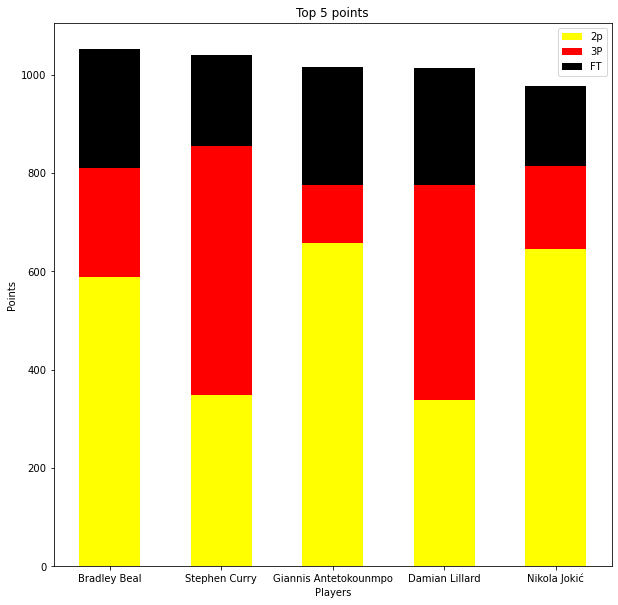

In [66]:
# create data
x = graph['Player']
y1 = graph['2P']
y2 = graph['3P']
y3 = graph['FT']
width=0.55

# Plot bars in stack manner
fig= plt.figure(figsize=(10,10))
plt.bar(x, y1, width, color='yellow')
plt.bar(x, y2, width, bottom=y1, color='red')
plt.bar(x, y3,width, bottom=y1+y2, color='black')
plt.xlabel("Players")
plt.ylabel("Points")
plt.legend(["2p", "3P", "FT"])
plt.title("Top 5 points")
plt.show()

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [67]:
# Using the Original Dataset to find the errors
nbaframe=nbaframe.fillna(0)
nbaframe.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,fg,checkfg
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,95,141,20,15,19,32,58,212,84,0
349,340,Jusuf Nurkić,C,26,POR,12,12,280,50,103,...,69,92,33,11,11,23,33,118,50,0
348,339,Kendrick Nunn,PG,25,MIA,28,16,839,152,330,...,80,94,76,32,9,50,54,398,152,0
347,338,Frank Ntilikina,PG,22,NYK,9,1,127,18,37,...,6,7,7,8,0,5,15,52,18,0
346,337,Jaylen Nowell,SG,21,MIN,22,0,367,71,170,...,32,42,23,10,4,12,40,198,71,0


<AxesSubplot:>

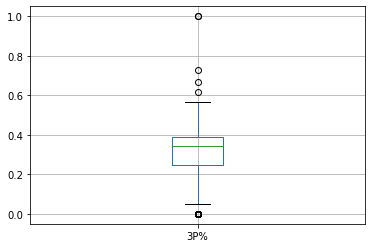

In [68]:
# Plotting the errors
nbaframe.boxplot(column='3P%')

#### Have Cleaned and fixed the errors in Part-1 chunk for the '3P%' Column.

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


In [69]:
# Using three other Feature Columns to compare with Total Points
relationship=cleandf[['Final PTS','FG','G','MP']]
relationship.head(10)

,Final PTS,FG,G,MP
38,1053,368,32,1143
110,1039,343,35,1194
13,1015,368,35,1189
277,1013,315,34,1224
240,977,379,36,1293
265,976,350,34,1209
231,930,350,36,1245
119,916,319,32,1125
133,905,285,30,990
509,897,262,34,1182


In [70]:
# Using the Pearson method of Correlation to find the relation between Total Points and the rest features
relationship.corr(method='pearson').round(2)

,Final PTS,FG,G,MP
Final PTS,1.00,0.99,0.70,0.90
FG,0.99,1.00,0.71,0.91
G,0.70,0.71,1.00,0.87
MP,0.90,0.91,0.87,1.00


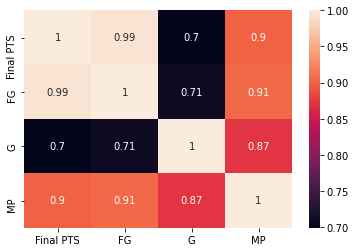

In [71]:
# Plotting the Correlation using a heatmap
corrMatrix = relationship.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### The above heatmap concludes that the 'FG' Column is the most positively Correlated to the Total Points, followed by the 'MP' Column and lastly the 'G' Column. 